In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

from src.utilities import *

In [17]:
df = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Book-Ratings.csv')

In [18]:
df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
dist = distribution_table(df['Book-Rating'])
dist.shape

(11, 2)

In [20]:
dist

,index,Book-Rating
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


In [21]:
dist.rename(columns={'index':'Book-Rating', 'Book-Rating':'Count'},inplace=True)

In [22]:
dist

,Book-Rating,Count
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


In [23]:
dist.sort_values(by='Book-Rating', inplace=True)

In [24]:
dist

,Book-Rating,Count
0,0,716109
10,1,1770
9,2,2759
8,3,5996
7,4,8904
5,5,50974
6,6,36924
3,7,76457
1,8,103736
4,9,67541


In [25]:
from src.utilities import *

AttributeError: 'AxesSubplot' object has no attribute 'labelpad'

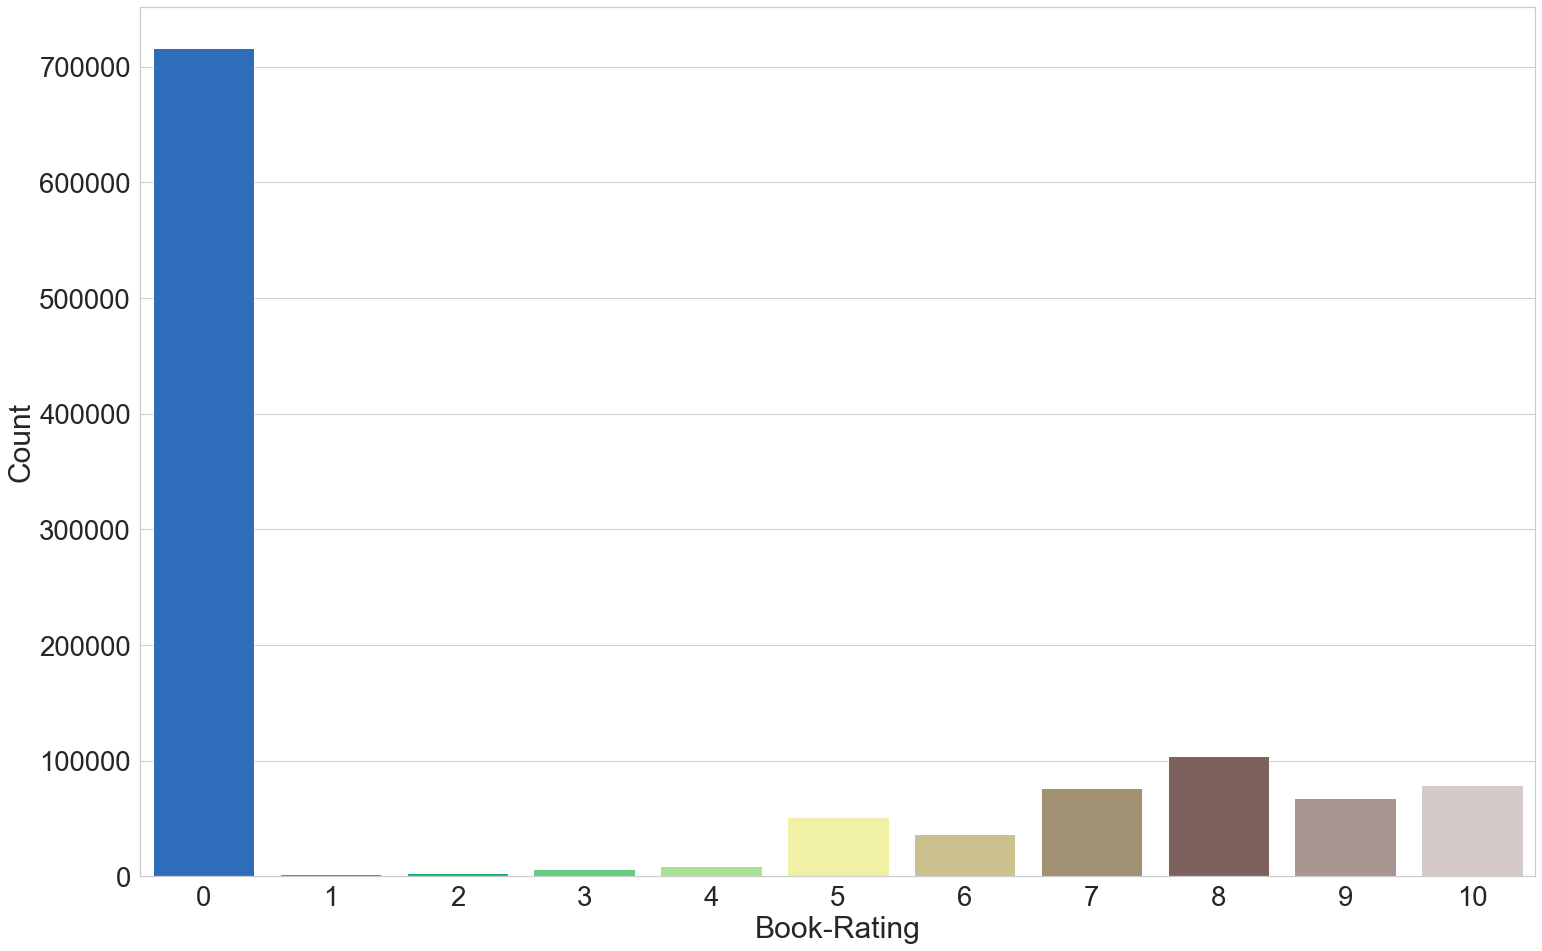

In [26]:
plot_distribution(dist, 
                  'Book-Rating', 
                  'Count', 
                  'Ratings', 
                  'Count', 
                  'Frequency Distribution: Book Ratings (Aug. to Sep. 2004)')

In [ ]:
palette()

# Books

In [ ]:
books = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Books.csv')

In [ ]:
books.shape

In [ ]:
books.head()

In [ ]:
books['Year-Of-Publication'].value_counts()

In [ ]:
books.ISBN.value_counts()

In [ ]:
books['Book-Title'].value_counts()

In [ ]:
books['Book-Author'].value_counts()

In [ ]:
books['Year-Of-Publication'].value_counts()

In [ ]:
books['Publisher'].value_counts()

In [ ]:
books['Publisher'].value_counts().head(30)

# Users

In [ ]:
users = csv('https://markg110.s3-us-west-1.amazonaws.com/data/BX-Users.csv')